### Import Data Preprocesing Modules

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

### Reading the Data

In [2]:
df = pd.read_csv(r"./churn.csv")
df.head()

,Customer ID,Gender,Senior Citizen,Partner,Dependents,tenure,Phone Service,Multiple Lines,Internet Service,Online Security,...,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn
0,7590-VHVEA,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
2,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
3,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
4,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7044 entries, 0 to 7043
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Customer ID        7044 non-null   object 
 1   Gender             7044 non-null   object 
 2   Senior Citizen     7044 non-null   int64  
 3   Partner            7044 non-null   object 
 4   Dependents         7044 non-null   object 
 5   tenure             7044 non-null   int64  
 6   Phone Service      7044 non-null   object 
 7   Multiple Lines     7044 non-null   object 
 8   Internet Service   7044 non-null   object 
 9   Online Security    7044 non-null   object 
 10  Online Backup      7044 non-null   object 
 11  Device Protection  7044 non-null   object 
 12  Tech Support       7044 non-null   object 
 13  Streaming TV       7044 non-null   object 
 14  Streaming Movies   7044 non-null   object 
 15  Contract           7044 non-null   object 
 16  Paperless Billing  7044 

In [4]:
df.isna().sum()

Customer ID          0
Gender               0
Senior Citizen       0
Partner              0
Dependents           0
tenure               0
Phone Service        0
Multiple Lines       0
Internet Service     0
Online Security      0
Online Backup        0
Device Protection    0
Tech Support         0
Streaming TV         0
Streaming Movies     0
Contract             0
Paperless Billing    0
Payment Method       0
Monthly Charges      0
Total Charges        0
Churn                0
dtype: int64

### Data Preprocessing 

In [5]:
X = pd.get_dummies(df.drop(['Churn' , 'Customer ID'] , axis = 1))

In [6]:
X.head()

,Senior Citizen,tenure,Monthly Charges,Gender_Female,Gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,Phone Service_No,...,Total Charges_995.35,Total Charges_996.45,Total Charges_996.85,Total Charges_996.95,Total Charges_997.65,Total Charges_997.75,Total Charges_998.1,Total Charges_999.45,Total Charges_999.8,Total Charges_999.9
0,0,1,29.85,1,0,0,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0
1,0,1,29.85,1,0,0,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0
2,0,34,56.95,0,1,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,2,53.85,0,1,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,45,42.30,0,1,1,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0


In [7]:
y = df['Churn'].apply(lambda x : 1 if x=="Yes" else 0)

In [8]:
y.head()

0    0
1    0
2    0
3    1
4    0
Name: Churn, dtype: int64

In [9]:
TRAIN_TEST_RATIO = 0.8
X_train,X_test,y_train,y_test = train_test_split(X , y , train_size= TRAIN_TEST_RATIO)

In [10]:
X_train.head()

,Senior Citizen,tenure,Monthly Charges,Gender_Female,Gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,Phone Service_No,...,Total Charges_995.35,Total Charges_996.45,Total Charges_996.85,Total Charges_996.95,Total Charges_997.65,Total Charges_997.75,Total Charges_998.1,Total Charges_999.45,Total Charges_999.8,Total Charges_999.9
4515,0,28,80.60,1,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3665,0,4,50.80,0,1,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
6158,0,3,19.85,0,1,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
5871,0,5,25.90,0,1,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
6780,0,29,45.00,0,1,1,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0


In [11]:
y_train.head()

4515    0
3665    0
6158    1
5871    1
6780    0
Name: Churn, dtype: int64

In [32]:
from tensorflow.keras.models import Sequential , load_model
from tensorflow.keras.layers import Dense
from sklearn.metrics import accuracy_score , mean_squared_error , mean_absolute_error , precision_recall_fscore_support,  confusion_matrix , ConfusionMatrixDisplay

In [13]:
model = Sequential()


Metal device set to: Apple M2

systemMemory: 16.00 GB
maxCacheSize: 5.33 GB



2023-03-24 11:13:42.418763: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-03-24 11:13:42.420401: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [14]:
# includes 32 neurons with "relu" as the activation function , input size will be the number of columns in the training dataset
layer1 = Dense(units = 32 , activation = "relu" , input_dim = len(X_train.columns))
model.add(layer1)

In [15]:
# hidden layer with 64 neurons
layer2= Dense(units = 64 , activation = "relu")
model.add(layer2)

In [16]:
# output layer with only one neuron and "sigmoid" activation function so as to convert the decimals into 0 or 1
layer3 = Dense(units = 1 , activation = "sigmoid")
model.add(layer3)

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                210432    
                                                                 
 dense_1 (Dense)             (None, 64)                2112      
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 212,609
Trainable params: 212,609
Non-trainable params: 0
_________________________________________________________________


In [18]:
model.layers

In [19]:
model.compile(loss = "binary_crossentropy" , optimizer= 'sgd' , metrics = 'accuracy')

In [20]:
model.fit(X_train , y_train , epochs = 200 , batch_size = 32)

Epoch 1/200


2023-03-24 11:13:43.098753: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2023-03-24 11:13:43.280866: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


177/177 [==============================] - 2s 8ms/step - loss: 0.5108 - accuracy: 0.7423
Epoch 2/200
177/177 [==============================] - 1s 5ms/step - loss: 0.4922 - accuracy: 0.7698
Epoch 3/200
177/177 [==============================] - 1s 5ms/step - loss: 0.4856 - accuracy: 0.7769
Epoch 4/200
177/177 [==============================] - 1s 5ms/step - loss: 0.4940 - accuracy: 0.7750
Epoch 5/200
177/177 [==============================] - 1s 5ms/step - loss: 0.4752 - accuracy: 0.7798
Epoch 6/200
177/177 [==============================] - 1s 6ms/step - loss: 0.4736 - accuracy: 0.7846
Epoch 7/200
177/177 [==============================] - 1s 5ms/step - loss: 0.4728 - accuracy: 0.7807
Epoch 8/200
177/177 [==============================] - 1s 5ms/step - loss: 0.4688 - accuracy: 0.7798
Epoch 9/200
177/177 [==============================] - 1s 5ms/step - loss: 0.4667 - accuracy: 0.7817
Epoch 10/200
177/177 [==============================] - 1s 5ms/step - loss: 0.4656 - accuracy: 0.7870
E

In [21]:
y_pred = model.predict(X_test)


23/45 [==============>...............] - ETA: 0s

2023-03-24 11:16:48.030932: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


45/45 [==============================] - 0s 7ms/step


In [22]:
y_pred[0:5]

array([[0.01059807],
       [0.218628  ],
       [0.12307817],
       [0.05117834],
       [0.28017738]], dtype=float32)

In [23]:
y_pred = [0 if val < 0.5 else 1 for val in y_pred]

In [24]:
y_pred[0:5]

[0, 0, 0, 0, 0]

In [25]:
round(accuracy_score(y_test , y_pred),2)

0.79

In [26]:
mean_squared_error(y_test,y_pred)

0.2093683463449255

In [27]:
mean_absolute_error(y_test , y_pred)

0.2093683463449255

In [28]:
model.save('churn_model')

INFO:tensorflow:Assets written to: churn_model/assets


In [29]:
del model

In [30]:
model = load_model(r"churn_model")

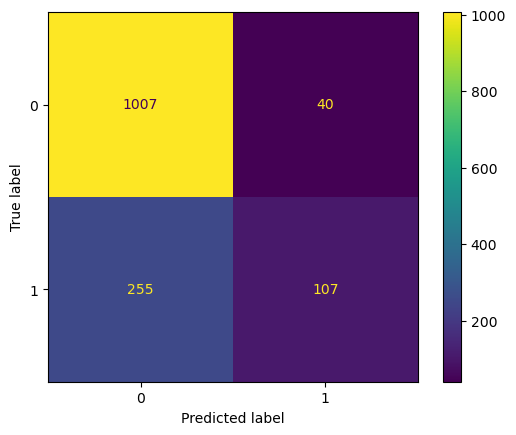

In [33]:
cm = confusion_matrix(y_test , y_pred)
cmdisp = ConfusionMatrixDisplay(confusion_matrix=cm)
cmdisp.plot()